In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('imdb_movies.csv')

In [9]:
df.shape

(100, 62)

In [10]:
d1=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,60,61]]
print(d1.columns)
print(len(df.columns))

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')
62


In [11]:
d1["Gross"]=d1["Gross"]/1000000
d1["budget"]=d1["budget"]/1000000
d1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,R,USA


In [12]:
d1['profit']=d1['Gross']-d1['budget']
d1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,content_rating,Country,profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,R,USA,38.695371


In [17]:
d1['budget'].describe()

count    100.000000
mean      78.384000
std       74.452947
min        3.000000
25%       15.750000
50%       42.250000
75%      150.000000
max      260.000000
Name: budget, dtype: float64

In [ ]:
# box plot use to represent the quartile distribution of data

In [13]:
x=[12,14,16,15,14,25,12,11,9,10,13,15,2,17,9,16]
print(x)
print(len(x))

[12, 14, 16, 15, 14, 25, 12, 11, 9, 10, 13, 15, 2, 17, 9, 16]
16


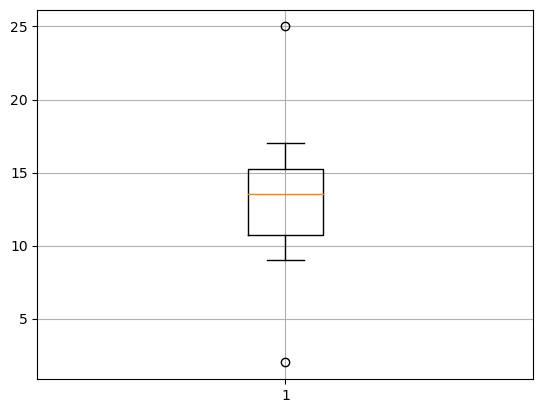

In [14]:
plt.boxplot(x)
plt.grid()
plt.show()

In [15]:
q1=np.percentile(x,25)
q2=np.percentile(x,50)
q3=np.percentile(x,75)
iqr=q3-q1
print('Q1',q1)
print('Q2',q2)
print('Q3',q3)
print('IQR',iqr)
bmax=q3+1.5*iqr
bmin=q1-1.5*iqr
print('max',bmax)
print('min',bmin)
x.sort()
print(x)
      

Q1 10.75
Q2 13.5
Q3 15.25
IQR 4.5
max 22.0
min 4.0
[2, 9, 9, 10, 11, 12, 12, 13, 14, 14, 15, 15, 16, 16, 17, 25]


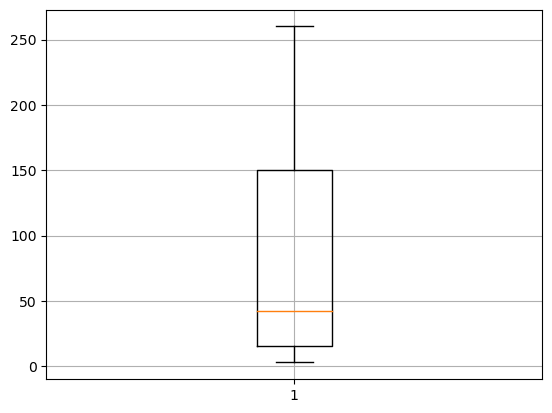

In [16]:
# plot a box plot of budget

plt.boxplot(d1['budget'])
plt.grid()
plt.show()

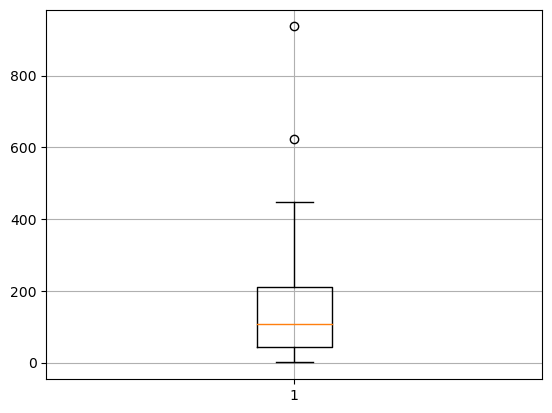

In [18]:
plt.boxplot(d1['Gross'])
plt.grid()
plt.show()

In [19]:
d1['Gross'].describe()

count    100.000000
mean     146.867867
std      145.400370
min        0.223838
25%       41.997524
50%      107.026591
75%      210.754845
max      936.662225
Name: Gross, dtype: float64

In [ ]:
# stack bar chart

In [22]:
# plot budget vs profit on a stacked area chart

r1=d1.groupby('genre_1')[['budget','profit']].mean()
r1.index.names=['genre']
r1

,budget,profit
genre,,
Action,130.351852,109.681664
Adventure,103.500000,50.094821
Animation,148.654545,90.472442
Biography,30.307692,51.766971
Comedy,15.555556,37.693860
Crime,32.944444,34.133466
Drama,29.511111,51.292340
Mystery,80.000000,47.968405


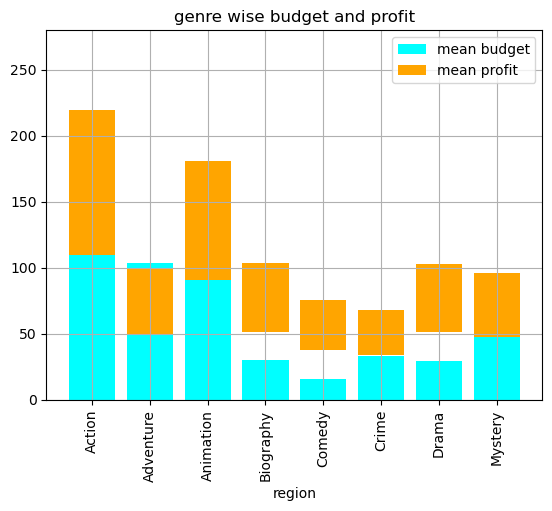

In [25]:
plt.bar(r1.index,r1['budget'],color='cyan',label='mean budget')
plt.bar(r1.index,r1['profit'],color='orange',label='mean profit',bottom=r1['profit'])
plt.xlabel('region')
plt.legend()
plt.title('genre wise budget and profit')
plt.xticks(rotation=90)
plt.grid()
plt.ylim(0,280)
plt.show()

In [27]:
r1

,budget,profit
genre,,
Action,130.351852,109.681664
Adventure,103.500000,50.094821
Animation,148.654545,90.472442
Biography,30.307692,51.766971
Comedy,15.555556,37.693860
Crime,32.944444,34.133466
Drama,29.511111,51.292340
Mystery,80.000000,47.968405


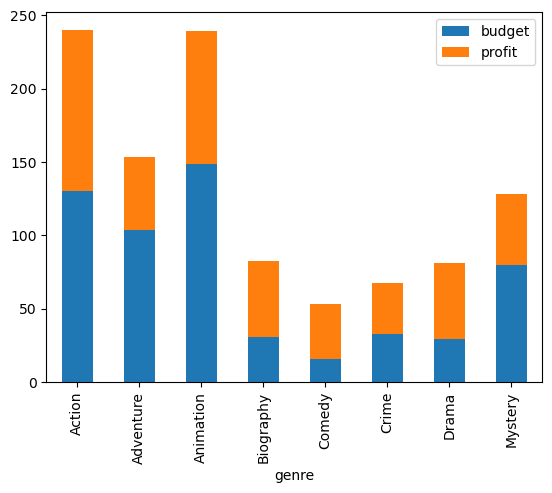

In [26]:
r1.plot(kind='bar',stacked=True)
plt.show()

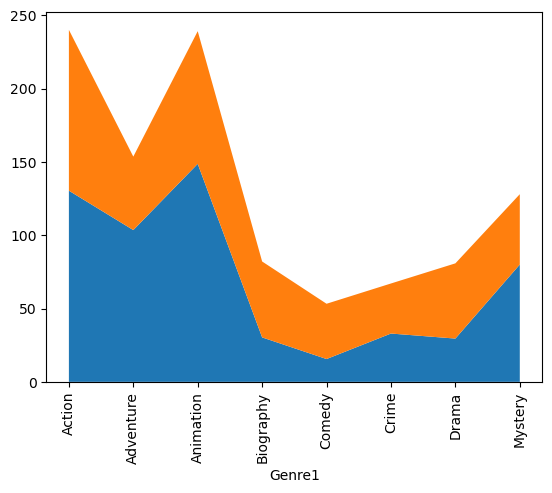

In [30]:
#stacked area chart
plt.stackplot(r1.index,r1['budget'],r1['profit'],labels=['budget','profit'])
plt.xlabel('Genre1')
plt.xticks(rotation=90)
plt.show()

In [44]:
r2=d1.groupby(['genre_1'])[['budget','Gross','profit']].mean()
r2.index.names=["Genre"]
r2

,budget,Gross,profit
Genre,,,
Action,130.351852,240.033516,109.681664
Adventure,103.500000,153.594821,50.094821
Animation,148.654545,239.126987,90.472442
Biography,30.307692,82.074664,51.766971
Comedy,15.555556,53.249416,37.693860
Crime,32.944444,67.077910,34.133466
Drama,29.511111,80.803451,51.292340
Mystery,80.000000,127.968405,47.968405


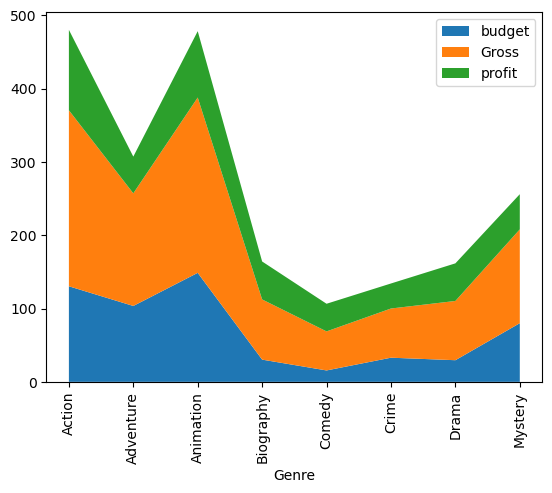

In [46]:
plt.stackplot(r2.index,r2['budget'],r2['Gross'],r2['profit'],
labels=['budget','Gross','profit'])
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.legend()
plt.show()